# Part II - Explanatory Data Analysis
## by Alberto Ivo Vieira

## Investigation Overview

The goals of this presentation are to analyze the usage patterns of the Ford GoBike system, focusing on how trip duration varies by age group, user type, and other demographic factors. The key insights include:
1. Subscribers tend to have shorter trip durations compared to Customers, indicating different usage patterns.
2. Trip duration increases with age, particularly among Customers, suggesting that older users may use the service for leisure rather than commuting.
3. There are notable differences in trip duration between genders, with female riders generally taking longer trips than male riders.
4. Peak usage times differ between Subscribers and Customers, with Subscribers showing more consistent usage throughout the day.

## Dataset Overview and Executive Summary

> The Ford GoBike System Data dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in California. The dataset includes features such as 
- trip duration
- start and end times
- start and end station names and IDs
- bike IDs
- user types (Subscriber or Customer)
- member birth year
- gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/ford_gobike_cleaned.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,41,869.750000,40-50
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,53,1030.900000,50-60
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,36,608.166667,30-40
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,51,26.416667,50-60
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,66,29.883333,60-70


## Visualization 1 - Trip Duration by User Type

Subscribers tend to have shorter trip durations compared to Customers, indicating different usage patterns.

Based on the plot 'Trip Duration by User Type', we can observe that Subscribers generally have shorter trip durations compared to Customers. The box plot illustrates that the median trip duration for Subscribers is significantly lower than that of Customers, suggesting that Subscribers are more likely to use the service for short, frequent trips, possibly for commuting purposes. In contrast, Customers exhibit a wider range of trip durations, indicating that they may use the service for longer, leisure-oriented rides. This distinction in usage patterns highlights the different needs and behaviors of the two user types within the Ford GoBike system.

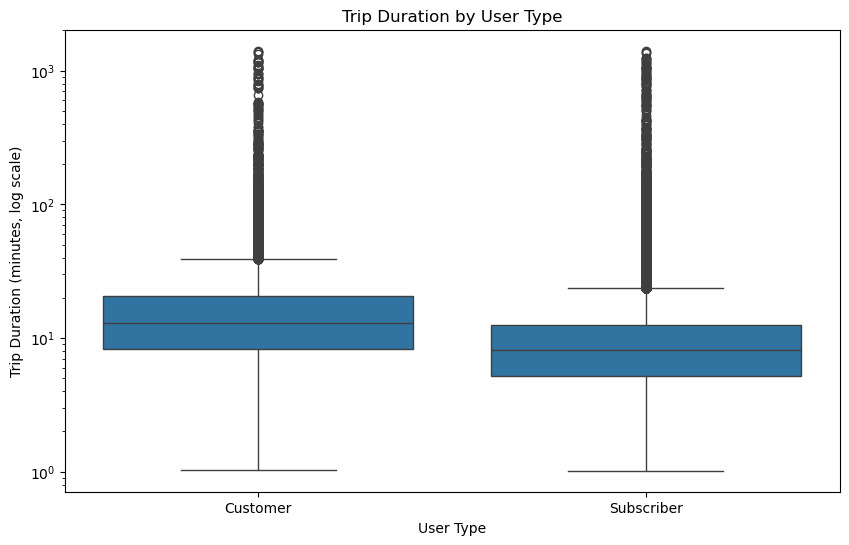

In [3]:
# Visualization to show how Subscribers tend to have shorter trip durations compared to Customers, indicating different usage patterns.
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration', data=df)
plt.yscale('log')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes, log scale)')
plt.show()

## Visualization 2 - Trip DUration by Age Group and User Type

Based on the plots below ('Trip Duration by Age Group', 'Trip Duration by Age Group and User Type' and 'Average Trip Duration by Age Group') we can observe that trip durations vary significantly across different age groups. The box plots indicate that younger users tend to have shorter trip durations, while older users exhibit a wider range of trip lengths. Additionally, the average trip duration by age group highlights the differences in usage patterns, with certain age groups favoring longer trips. This analysis provides valuable insights into how age influences trip behavior within the Ford GoBike system.

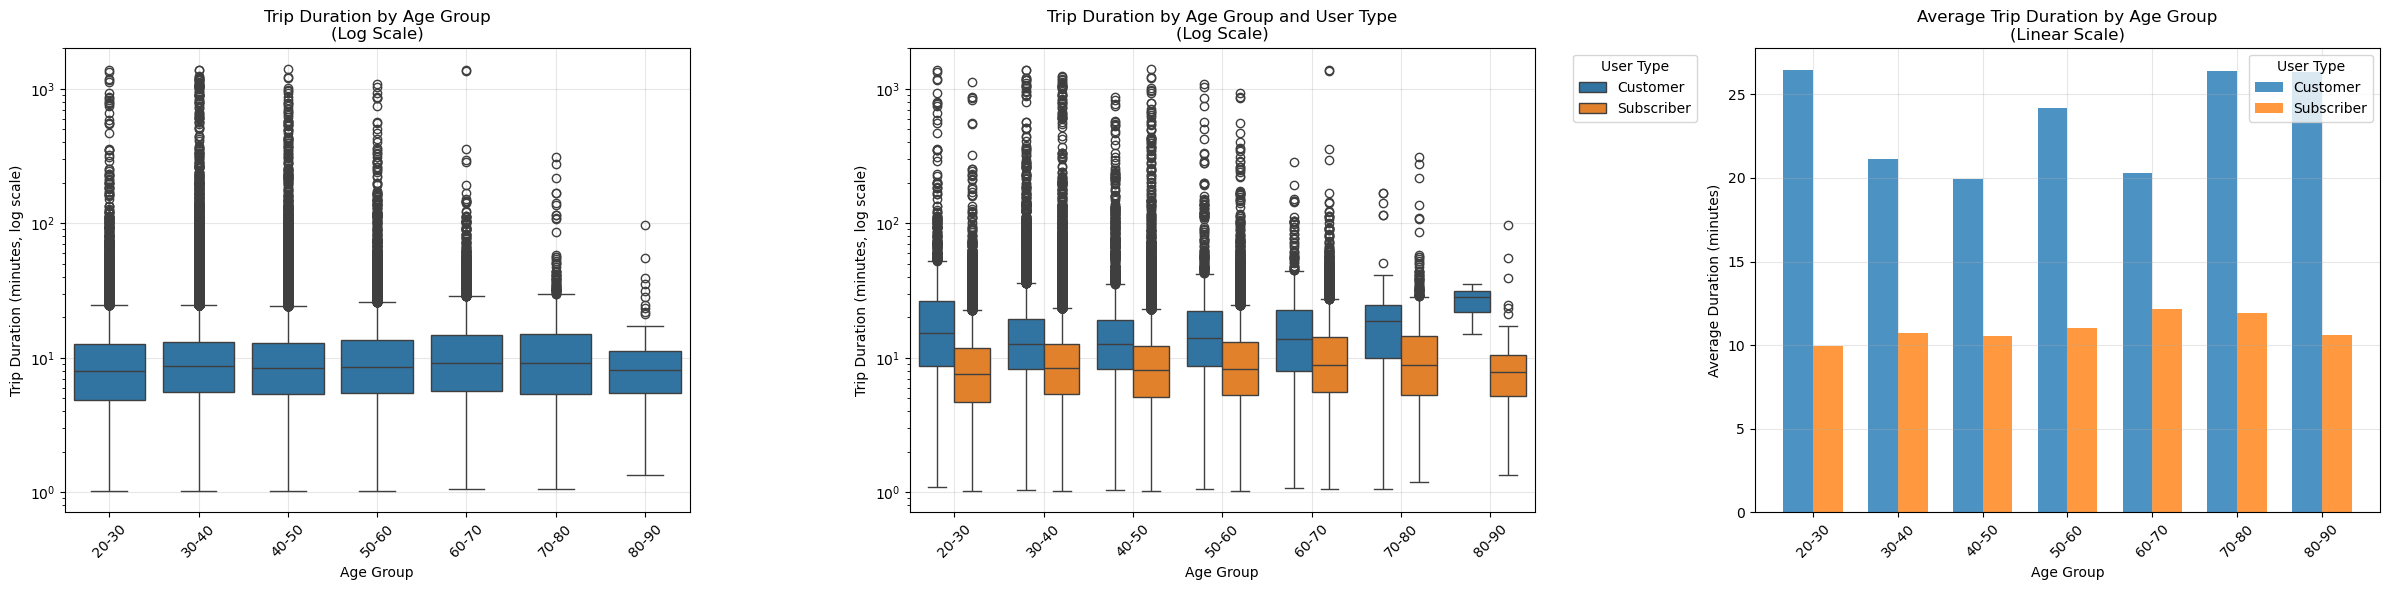

Avg duration (minutes) by age group and user type:
                      count   mean  median    std
age_group user_type                              
20-30     Customer     2337  26.47   15.25  72.14
          Subscriber  20617   9.95    7.50  17.04
30-40     Customer     7965  21.12   12.60  59.58
          Subscriber  76548  10.72    8.32  22.68
40-50     Customer     4107  19.96   12.63  41.40
          Subscriber  36975  10.54    8.03  23.34
50-60     Customer     1461  24.18   14.08  59.66
          Subscriber  15866  11.02    8.28  18.51
60-70     Customer      612  20.28   13.68  24.59
          Subscriber   6784  12.17    8.90  26.22
70-80     Customer       70  26.43   18.75  34.12
          Subscriber   1345  11.90    8.83  15.67
80-90     Customer        5  26.32   28.25   8.06
          Subscriber     71  10.59    7.85  13.21

Insight: Difference between Customer and Subscriber by Age
20-30: Customers use 2.7x more time than Subscribers (26.5 vs 9.9 min)
30-40: Customers u

In [4]:
# Analysis of trip duration by age group
age_order = sorted(df['age_group'].unique())

plt.figure(figsize=(24, 6))

# First plot: Original Boxplot (log scale)
plt.subplot(1, 3, 1)
sns.boxplot(x='age_group', y='duration', data=df, order=age_order)
plt.yscale('log')
plt.title('Trip Duration by Age Group\n(Log Scale)')
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (minutes, log scale)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Second plot: Boxplot by user type
plt.subplot(1, 3, 2)
sns.boxplot(x='age_group', y='duration', hue='user_type', data=df, order=age_order)
plt.yscale('log')
plt.title('Trip Duration by Age Group and User Type\n(Log Scale)')
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (minutes, log scale)')
plt.xticks(rotation=45)
plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Third plot: Average duration by group (linear scale)
plt.subplot(1, 3, 3)
# Calculate statistics by group and user type
duration_stats = df.groupby(['age_group', 'user_type'])['duration'].agg(['mean', 'median']).reset_index()

# Create grouped bar chart for mean
x_pos = range(len(age_order))
width = 0.35

user_types = df['user_type'].unique()

for i, user_type in enumerate(user_types):
    if pd.notna(user_type):
        subset = duration_stats[duration_stats['user_type'] == user_type]
        means = [subset[subset['age_group'] == age]['mean'].iloc[0] if len(subset[subset['age_group'] == age]) > 0 else 0 for age in age_order]
        
        plt.bar([x + (i-0.5)*width for x in x_pos], means, 
                width, label=user_type, alpha=0.8)

plt.title('Average Trip Duration by Age Group\n(Linear Scale)')
plt.xlabel('Age Group')
plt.ylabel('Average Duration (minutes)')
plt.xticks(x_pos, age_order, rotation=45)
plt.legend(title='User Type')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas complementares
print("Avg duration (minutes) by age group and user type:")
print("="*60)
duration_summary = df.groupby(['age_group', 'user_type'])['duration'].agg(['count', 'mean', 'median', 'std']).round(2)
print(duration_summary)

print("\n" + "="*60)
print("Insight: Difference between Customer and Subscriber by Age")
print("="*60)
for age in age_order:
    age_data = df[df['age_group'] == age]
    if len(age_data) > 0:
        customer_mean = age_data[age_data['user_type'] == 'Customer']['duration'].mean()
        subscriber_mean = age_data[age_data['user_type'] == 'Subscriber']['duration'].mean()
        
        if pd.notna(customer_mean) and pd.notna(subscriber_mean):
            ratio = customer_mean / subscriber_mean
            print(f"{age}: Customers use {ratio:.1f}x more time than Subscribers ({customer_mean:.1f} vs {subscriber_mean:.1f} min)")
        elif pd.notna(customer_mean):
            print(f"{age}: Only Customers ({customer_mean:.1f} min)")
        elif pd.notna(subscriber_mean):
            print(f"{age}: Only Subscribers ({subscriber_mean:.1f} min)")

## Visualization 3 - Trip Duration by Gender

Based on the plot 'Trip Duration by gender', we can observe that there are notable differences in trip duration between male and female users. The box plots indicate that male users tend to have longer trip durations compared to female users. This analysis provides valuable insights into how gender influences trip behavior within the Ford GoBike system.

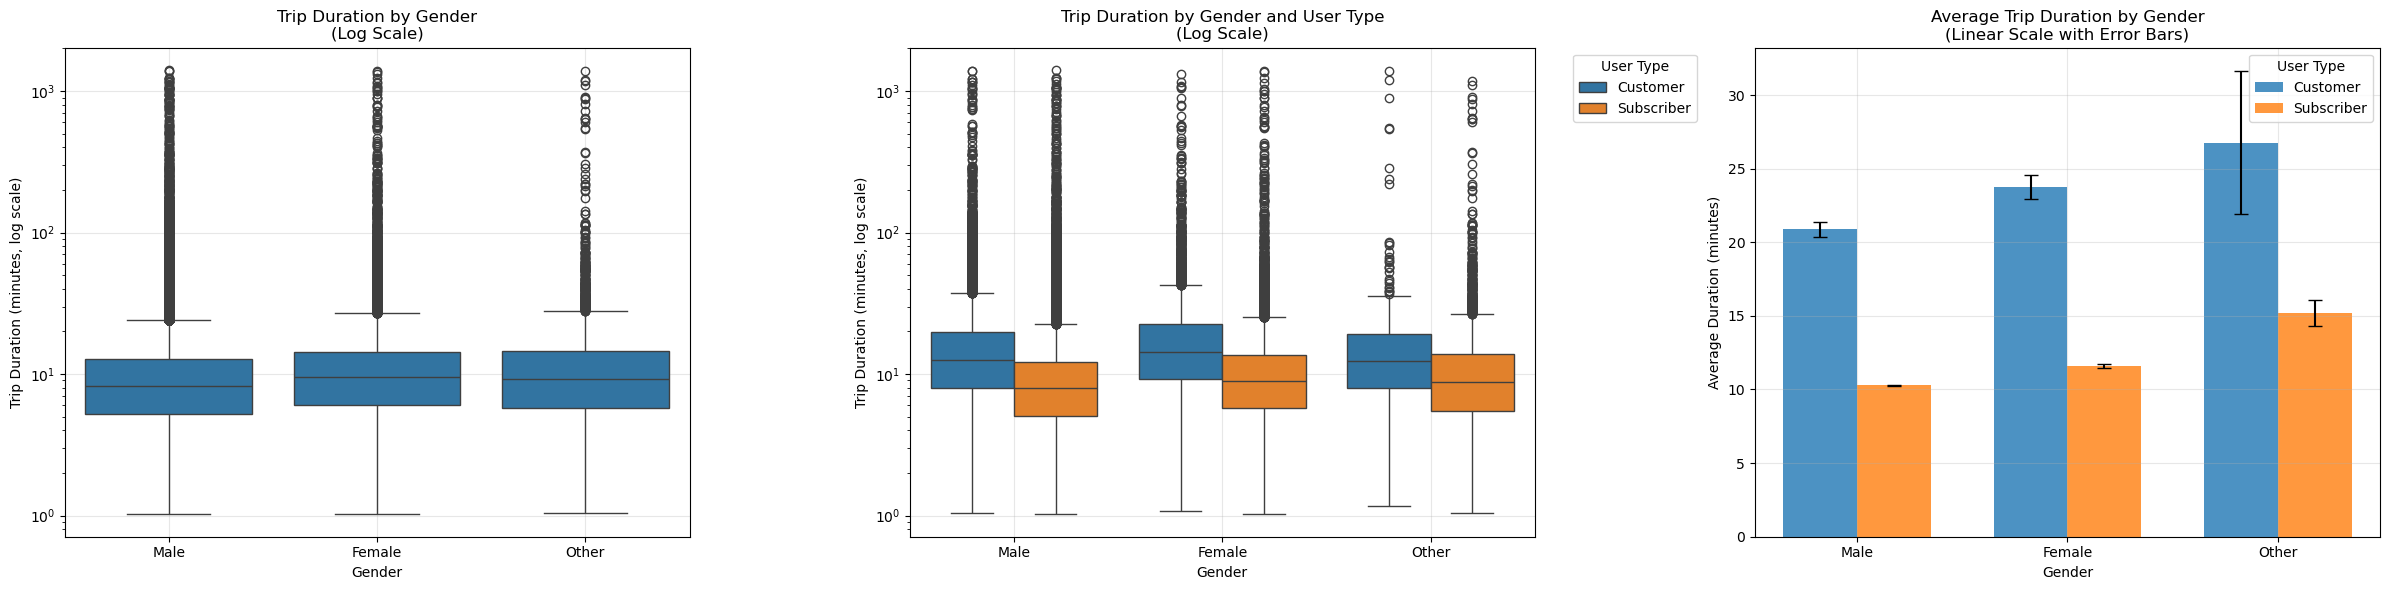

Trip Duration Analysis by Gender and User Type
                           count   mean  median     std
member_gender user_type                                
Female        Customer      4622  23.74   14.29   55.34
              Subscriber   36149  11.61    8.98   24.35
Male          Customer     11487  20.90   12.53   54.62
              Subscriber  118861  10.28    7.92   19.80
Other         Customer       448  26.77   12.30  102.82
              Subscriber    3196  15.20    8.85   49.46

Gender Comparison: Key Insights
Overall Statistics by Gender:
                mean  median   count
member_gender                       
Female         12.99    9.47   40771
Male           11.21    8.22  130348
Other          16.63    9.25    3644

Detailed Analysis:

Male:
  Total trips: 130,348
  Overall average: 11.2 minutes
  Customer average: 20.9 minutes (11,487 trips)
  Subscriber average: 10.3 minutes (118,861 trips)
  Customer/Subscriber ratio: 2.0x

Female:
  Total trips: 40,771
  Overall a

In [5]:
# Comprehensive analysis of trip duration by gender
# Calculate mean duration by gender and order by mean
gender_means = df.groupby('member_gender')['duration'].mean().sort_values()
gender_order = gender_means.index.tolist()

plt.figure(figsize=(24, 6))

# First chart: Original boxplot (log scale)
plt.subplot(1, 3, 1)
sns.boxplot(x='member_gender', y='duration', data=df, order=gender_order)
plt.yscale('log')
plt.title('Trip Duration by Gender\n(Log Scale)')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes, log scale)')
plt.grid(True, alpha=0.3)

# Second chart: Boxplot by gender and user type
plt.subplot(1, 3, 2)
sns.boxplot(x='member_gender', y='duration', hue='user_type', data=df, order=gender_order)
plt.yscale('log')
plt.title('Trip Duration by Gender and User Type\n(Log Scale)')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes, log scale)')
plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Third chart: Average duration comparison with confidence intervals
plt.subplot(1, 3, 3)
# Calculate statistics for bar chart
duration_stats = df.groupby(['member_gender', 'user_type'])['duration'].agg(['mean', 'std', 'count']).reset_index()

# Create grouped bar chart
x_pos = range(len(gender_order))
width = 0.35

user_types = df['user_type'].dropna().unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, user_type in enumerate(user_types):
    subset = duration_stats[duration_stats['user_type'] == user_type]
    means = []
    errors = []
    
    for gender in gender_order:
        gender_data = subset[subset['member_gender'] == gender]
        if len(gender_data) > 0:
            means.append(gender_data['mean'].iloc[0])
            # Calculate standard error
            std = gender_data['std'].iloc[0]
            count = gender_data['count'].iloc[0]
            se = std / (count ** 0.5) if count > 0 else 0
            errors.append(se)
        else:
            means.append(0)
            errors.append(0)
    
    plt.bar([x + (i-0.5)*width for x in x_pos], means, 
            width, label=user_type, color=colors[i], alpha=0.8,
            yerr=errors, capsize=5)

plt.title('Average Trip Duration by Gender\n(Linear Scale with Error Bars)')
plt.xlabel('Gender')
plt.ylabel('Average Duration (minutes)')
plt.xticks(x_pos, gender_order)
plt.legend(title='User Type')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comprehensive statistics
print("Trip Duration Analysis by Gender and User Type")
print("=" * 60)
duration_summary = df.groupby(['member_gender', 'user_type'])['duration'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
print(duration_summary)

print("\n" + "=" * 60)
print("Gender Comparison: Key Insights")
print("=" * 60)

# Overall gender comparison
overall_stats = df.groupby('member_gender')['duration'].agg(['mean', 'median', 'count']).round(2)
print("Overall Statistics by Gender:")
print(overall_stats)

print("\nDetailed Analysis:")
for gender in gender_order:
    gender_data = df[df['member_gender'] == gender]
    if len(gender_data) > 0:
        customer_data = gender_data[gender_data['user_type'] == 'Customer']['duration']
        subscriber_data = gender_data[gender_data['user_type'] == 'Subscriber']['duration']
        
        print(f"\n{gender}:")
        print(f"  Total trips: {len(gender_data):,}")
        print(f"  Overall average: {gender_data['duration'].mean():.1f} minutes")
        
        if len(customer_data) > 0:
            print(f"  Customer average: {customer_data.mean():.1f} minutes ({len(customer_data):,} trips)")
        
        if len(subscriber_data) > 0:
            print(f"  Subscriber average: {subscriber_data.mean():.1f} minutes ({len(subscriber_data):,} trips)")
        
        if len(customer_data) > 0 and len(subscriber_data) > 0:
            ratio = customer_data.mean() / subscriber_data.mean()
            print(f"  Customer/Subscriber ratio: {ratio:.1f}x")

# Statistical significance test
print("\n" + "=" * 60)
print("Statistical Analysis")
print("=" * 60)

from scipy import stats
if len(gender_order) >= 2:
    group1_data = df[df['member_gender'] == gender_order[0]]['duration']
    group2_data = df[df['member_gender'] == gender_order[1]]['duration']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    
    print(f"T-test between {gender_order[0]} and {gender_order[1]}:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4e}")
    print(f"Result: {'Statistically significant' if p_value < 0.05 else 'Not statistically significant'} difference")
    
    # Effect size (Cohen's d)
    pooled_std = ((group1_data.std()**2 + group2_data.std()**2) / 2) ** 0.5
    cohens_d = (group1_data.mean() - group2_data.mean()) / pooled_std
    print(f"Effect size (Cohen's d): {cohens_d:.4f}")
    
    if abs(cohens_d) < 0.2:
        effect_interpretation = "small"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "medium" 
    else:
        effect_interpretation = "large"
    
    print(f"Effect size interpretation: {effect_interpretation}")

## Visualization 4 - Distribution of Trip Duration by Hour of Day and User Type

Based on the plots below ('Distribution of Trip Duration by Hour of Day' and 'Distribution of Trip Duration by Hour of Day and User Type'), we can observe how trip durations vary throughout the day and across different user types. The heatmaps indicate peak usage times and the corresponding trip durations, providing insights into when users are most active and how their trip behaviors differ by user type. This analysis is crucial for understanding daily usage patterns within the Ford GoBike system.

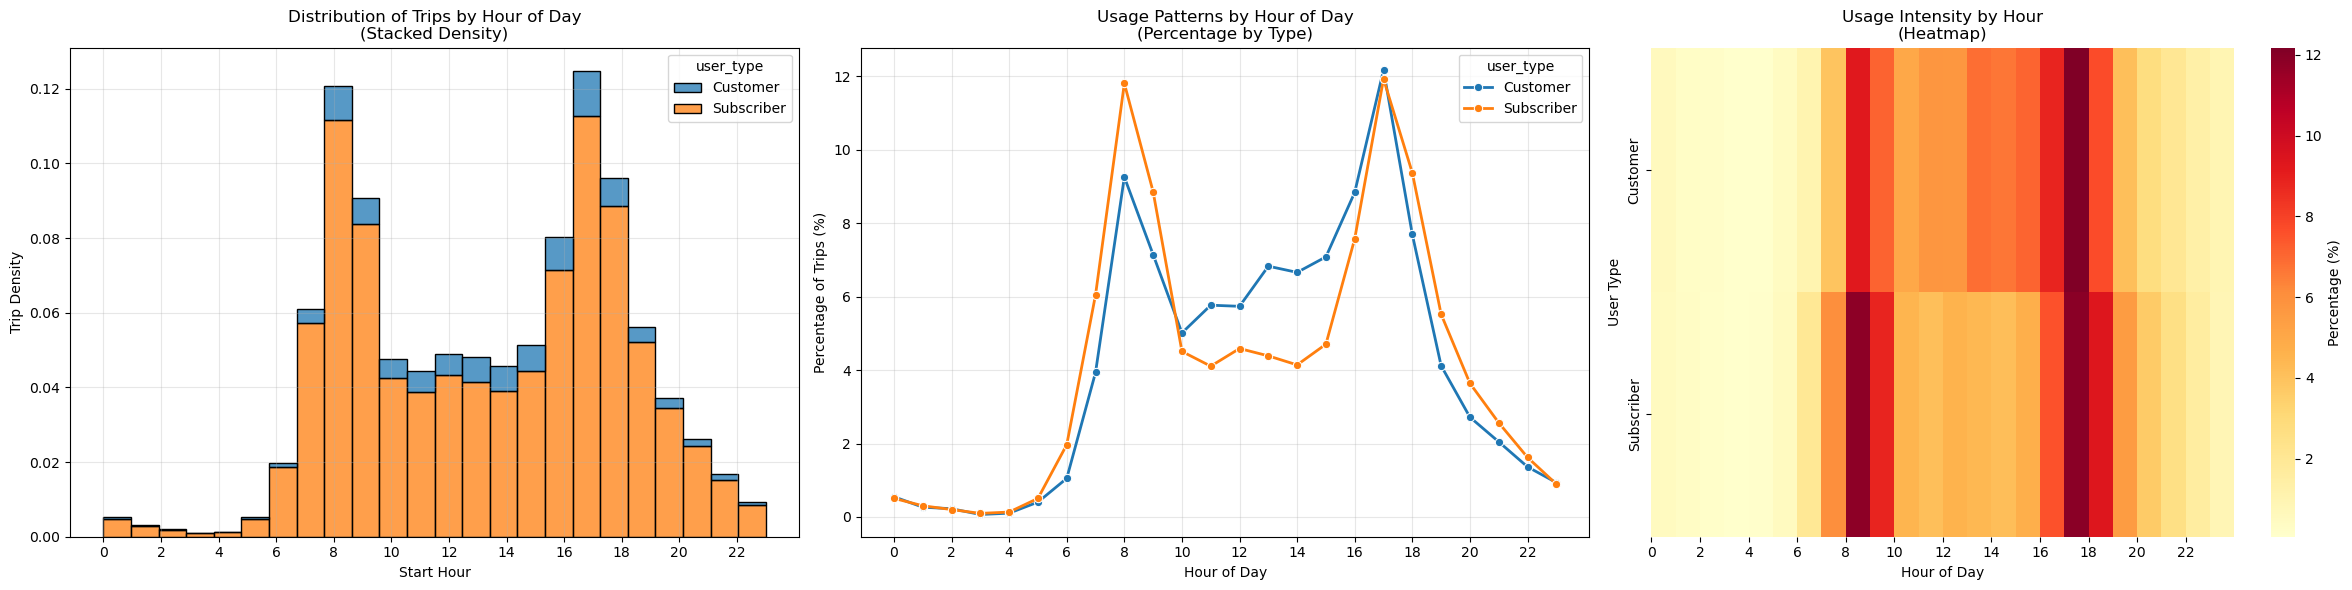

Peak hours by user type:
Customer: 17h (12.2% of trips)
Subscriber: 17h (11.9% of trips)

Total trips analyzed: 174,763


In [6]:
# Extract hour from start_time
df['start_hour'] = (df['start_time'].astype('datetime64[ns]')).dt.hour

# Prepare data for percentage calculations
hourly = df.groupby(['start_hour','user_type']).size().reset_index(name='count')
hourly['percent'] = hourly.groupby('user_type')['count'].transform(lambda x: x/x.sum()*100)

# Analysis of usage patterns by hour of the day
plt.figure(figsize=(24, 6))

# First plot: Histogram stacked (density)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="start_hour", hue="user_type", stat="density", multiple="stack", bins=24)
plt.title("Distribution of Trips by Hour of Day\n(Stacked Density)")
plt.xlabel("Start Hour")
plt.ylabel("Trip Density")
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# Second plot: Line plot percentage (cleaner for comparing peaks)
plt.subplot(1, 3, 2)
sns.lineplot(data=hourly, x="start_hour", y="percent", hue="user_type", marker="o", linewidth=2)
plt.title("Usage Patterns by Hour of Day\n(Percentage by Type)")
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Trips (%)")
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# Third plot: Heatmap by user type and hour
plt.subplot(1, 3, 3)
# Create pivot table for the heatmap
heatmap_data = df.groupby(['user_type', 'start_hour']).size().unstack(fill_value=0)
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

sns.heatmap(heatmap_percent, 
            annot=False, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage (%)'})
plt.title("Usage Intensity by Hour\n(Heatmap)")
plt.xlabel("Hour of Day")
plt.ylabel("User Type")
plt.xticks(range(0, 24, 2), range(0, 24, 2))

plt.tight_layout()
plt.show()

# Complementary statistics
print("Peak hours by user type:")
for user_type in df['user_type'].unique():
    if pd.notna(user_type):
        subset = hourly[hourly['user_type'] == user_type]
        peak_hour = subset.loc[subset['percent'].idxmax(), 'start_hour']
        peak_percent = subset['percent'].max()
        print(f"{user_type}: {peak_hour:02d}h ({peak_percent:.1f}% of trips)")

print(f"\nTotal trips analyzed: {len(df):,}")

### Executive Summary:

> The analysis of the Ford GoBike system data reveals distinct usage patterns based on user type, age, and trip duration. Key insights include the higher usage rates among younger users, the significant impact of user type on trip duration, and the presence of outliers in trip duration that warrant further investigation.

### Business Recommendations:
1. **Targeted Marketing Campaigns**: Develop marketing strategies that focus on younger demographics, particularly those aged 18-35, who are the most frequent users of the service. Tailoring promotions and advertisements to this age group could increase user engagement and subscription rates.
2. **User Type-Specific Services**: Recognize the differing needs of Subscribers and Customers. For Subscribers, who tend to have shorter trip durations, consider implementing loyalty programs or incentives for frequent use. For Customers, who exhibit longer trip durations, explore partnerships with local businesses or tourist attractions to enhance their experience.
3. **Addressing Outliers**: Investigate the causes of outlier trip durations, particularly those exceeding 1000 minutes. Understanding whether these are due to data entry errors, theft, or other factors can help improve data quality and inform operational decisions.
4. **Service Optimization**: Analyze peak usage times and adjust bike availability and maintenance schedules accordingly. Ensuring that bikes are available during high-demand periods can enhance user satisfaction and operational efficiency.